In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'CADUSD=X'
numbers_in_currency = 'USD'
share_name = 'PAAS.TO'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount
## Pull historical USD national currency rates to dividend & calculate historical dividend in USD

In [3]:
# ticker_share = yf.Ticker(share_name)
# dividend = ticker_share.history(period='max', interval="1wk")
# dividend = dividend[dividend['Dividends'] > 0]
# dividend = dividend.rename(columns={'Dividends': 'local_amount'})

# dividend['real_date'] = dividend.index 
# dividend['real_date'] = dividend['real_date'].dt.tz_localize(None)

# dividend = dividend[['real_date', 'local_amount']]

# dividend['usd_rate'] = utils.daily_price(ticker=currency_pair, end=dividend['real_date'], days_earlier=3)
# dividend['currency'] = [currency_pair.split(sep='=')[0] for x in range(len(dividend))]
# dividend['usd_dividend'] = dividend['local_amount'] / dividend['usd_rate']

# dividend.head()

## Extend your input statement table with historical dividend data and calculate share prices!

# 1.2. Raw input statement data

In [4]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2012-12-31,247,-162,85,-21,-6,-99,19,-9,-22,...,-76,-141,-1,-8,-10,-2,-20,-1,-80,152
1,2013-03-31,243,-168,75,-6,-6,-18,-5,40,-20,...,-48,-88,0,-19,-5,-21,-46,0,-102,152
2,2013-06-30,176,-172,4,-5,-6,-181,5,-182,-5,...,45,0,0,-19,-1,14,-6,-1,-7,152
3,2013-09-30,214,-180,34,-4,-3,1,-3,26,-12,...,-9,-51,0,-19,0,-2,-21,1,-30,152
4,2013-12-31,192,-173,19,-1,-3,-320,-7,-312,-19,...,47,13,-1,-19,0,2,-17,0,42,152


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

## Pull historical average USD national currency rates and add to the dataframe

In [7]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares,real_date,usd_nat_currency
0,2012-12-31,247,-162,85,-21,-6,-99,19,-9,-22,...,-1,-8,-10,-2,-20,-1,-80,152,2013-02-11,1.009144
1,2013-03-31,243,-168,75,-6,-6,-18,-5,40,-20,...,0,-19,-5,-21,-46,0,-102,152,2013-04-21,0.993007
2,2013-06-30,176,-172,4,-5,-6,-181,5,-182,-5,...,0,-19,-1,14,-6,-1,-7,152,2013-07-21,0.977820
3,2013-09-30,214,-180,34,-4,-3,1,-3,26,-12,...,0,-19,0,-2,-21,1,-30,152,2013-10-21,0.962661
4,2013-12-31,192,-173,19,-1,-3,-320,-7,-312,-19,...,-1,-19,0,2,-17,0,42,152,2014-02-11,0.953063


## Convert USD values related to IS, BS, CFS to national currency

In [8]:
# convert columns into national currency
data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
data_nat_curr.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares,real_date,usd_nat_currency
0,2012-12-31,249.258596,-163.481346,85.777250,-21.192026,-6.054865,-99.905267,19.173738,-9.082297,-22.201170,...,-1.009144,-8.073153,-10.091441,-2.018288,-20.182882,-1.009144,-80.731529,152,2013-02-11,1.009144
1,2013-03-31,241.300756,-166.825214,74.475542,-5.958043,-5.958043,-17.874130,-4.965036,39.720289,-19.860145,...,0.000000,-18.867137,-4.965036,-20.853152,-45.678332,0.000000,-101.286737,152,2013-04-21,0.993007
2,2013-06-30,172.096352,-168.185071,3.911281,-4.889101,-5.866921,-176.985453,4.889101,-177.963273,-4.889101,...,0.000000,-18.578583,-0.977820,13.689483,-5.866921,-0.977820,-6.844741,152,2013-07-21,0.977820
3,2013-09-30,206.009362,-173.278903,32.730459,-3.850642,-2.887982,0.962661,-2.887982,25.029175,-11.551927,...,0.000000,-18.290551,0.000000,-1.925321,-20.215872,0.962661,-28.879817,152,2013-10-21,0.962661
4,2013-12-31,182.988150,-164.879948,18.108202,-0.953063,-2.859190,-304.980250,-6.671443,-297.355744,-18.108202,...,-0.953063,-18.108202,0.000000,1.906127,-16.202076,0.000000,40.028658,152,2014-02-11,0.953063


# 2. Filter out unnecesary columns

In [9]:
filtered_nat_curr = utils.filter_raw_data(data_nat_curr)

# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(filtered_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [13]:
obj = yf.Ticker('YAR.OL')
ticker_share_price = obj.history(interval="1wk", start=data.date.min(), end=pd.Timestamp.now())
# add new date column due to pd.merge_asof match
ticker_share_price['real_date'] = ticker_share_price.index
# remove localization (timezone) to let merge the two columns
ticker_share_price['real_date'] = ticker_share_price['real_date'].dt.tz_localize(None)
# add share price column and keep the date and share prices
ticker_share_price['share_price'] = ticker_share_price['Close']
ticker_share_price = ticker_share_price[['real_date', 'share_price']]

ticker_share_price.tail()

,real_date,share_price
Date,,
2024-01-22 00:00:00+01:00,2024-01-22,353.000000
2024-01-29 00:00:00+01:00,2024-01-29,352.600006
2024-02-05 00:00:00+01:00,2024-02-05,357.200012
2024-02-12 00:00:00+01:00,2024-02-12,355.000000
2024-02-19 00:00:00+01:00,2024-02-19,345.600006


## Merge the statement dataset with share prices

In [14]:
merged_nat_curr = pd.merge_asof(left=ticker_share_price, right=ratios_nat_curr, on='real_date', direction='backward')
# drop rows with np.Nan and reset index
merged_nat_curr = merged_nat_curr.dropna()
merged_nat_curr = merged_nat_curr.reset_index(drop=True)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2013-02-11,146.354355,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
1,2013-02-18,142.784714,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
2,2013-02-25,139.011139,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
3,2013-03-04,140.235001,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
4,2013-03-11,136.920319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [15]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
0,2013-02-11,146.354355,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-172.220988,8.131423,22.312031,37.490283
1,2013-02-18,142.784714,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-168.020450,7.933094,21.767832,36.575880
2,2013-02-25,139.011139,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-163.579934,7.723435,21.192542,35.609237
3,2013-03-04,140.235001,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-165.020101,7.791432,21.379122,35.922743
4,2013-03-11,136.920319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,5.586207,...,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-161.119583,7.607269,20.873792,35.073651


# Calculate Dividend yield and currency-share price correlation

In [17]:
obj = yf.Ticker(currency_pair)
obj2 = yf.Ticker(share_name)
usd_nat_curr = obj.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
usd_nat_curr['date'] = usd_nat_curr.index
usd_nat_curr['date'] = usd_nat_curr['date'].dt.tz_localize(None)
usd_nat_curr['currency_rate'] = usd_nat_curr['Close']

In [18]:
ticker_all_price = obj2.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
ticker_all_price['date'] = ticker_all_price.index
ticker_all_price['date'] = ticker_all_price['date'].dt.tz_localize(None)
ticker_all_price['share_price'] = ticker_all_price['Close']
ticker_all_price['dividend_yield'] = ticker_all_price['Dividends'] * 100 / ticker_all_price['Close']

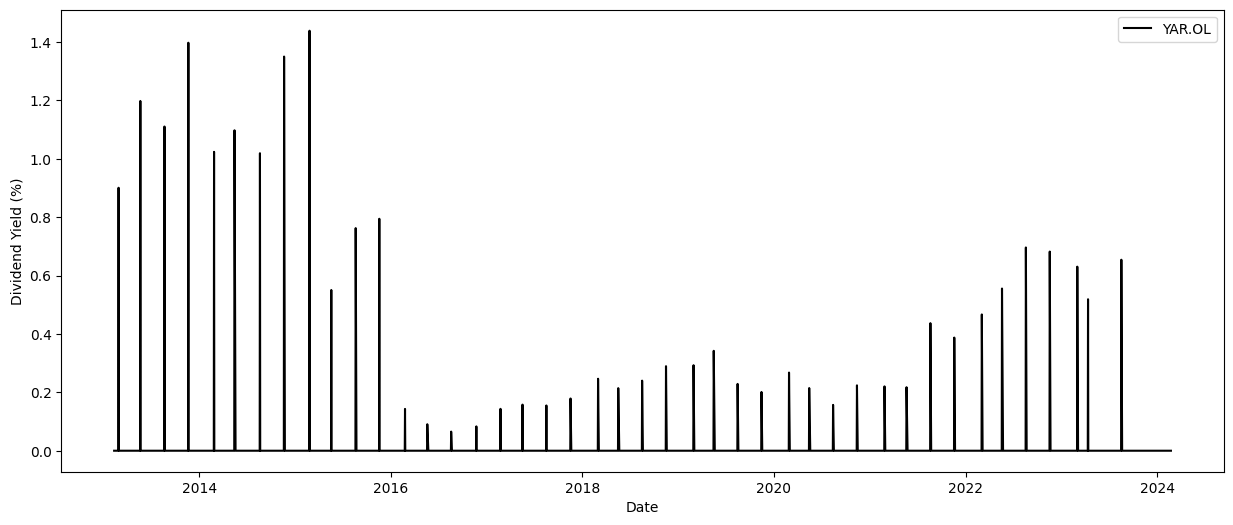

In [19]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(ticker_all_price.index, ticker_all_price['dividend_yield'], color='k', label='YAR.OL')

ax1.set_xlabel('Date')
ax1.set_ylabel('Dividend Yield (%)', color='k')

plt.legend()
plt.show()

In [20]:
share_price_currency_rate_correlation = pd.merge_asof(left=usd_nat_curr, right=ticker_all_price, on='date')
share_price_currency_rate_correlation.index = share_price_currency_rate_correlation['date']
share_price_currency_rate_correlation = share_price_currency_rate_correlation[['currency_rate', 'share_price']]

share_price_currency_rate_correlation.corr()['share_price']

currency_rate   -0.378946
share_price      1.000000
Name: share_price, dtype: float64

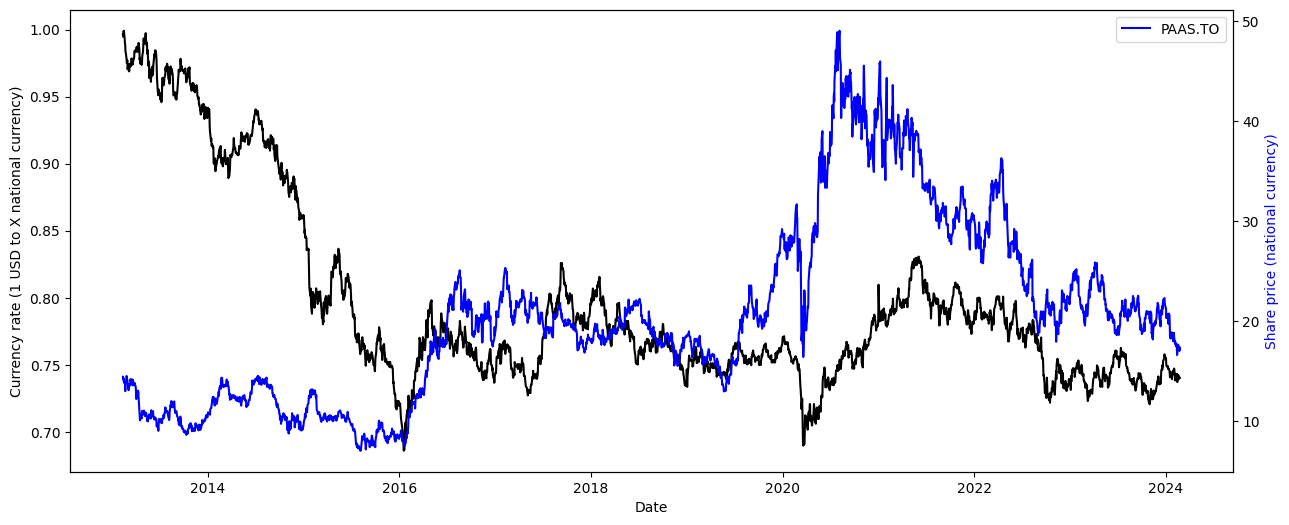

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()
ax1.plot(usd_nat_curr.index, usd_nat_curr['Close'], color='k', label='USD / national currency')
ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Currency rate (1 USD to X national currency)', color='k')
ax2.set_ylabel('Share price (national currency)', color='b')

plt.legend()
plt.show()

# Share price and value ratios

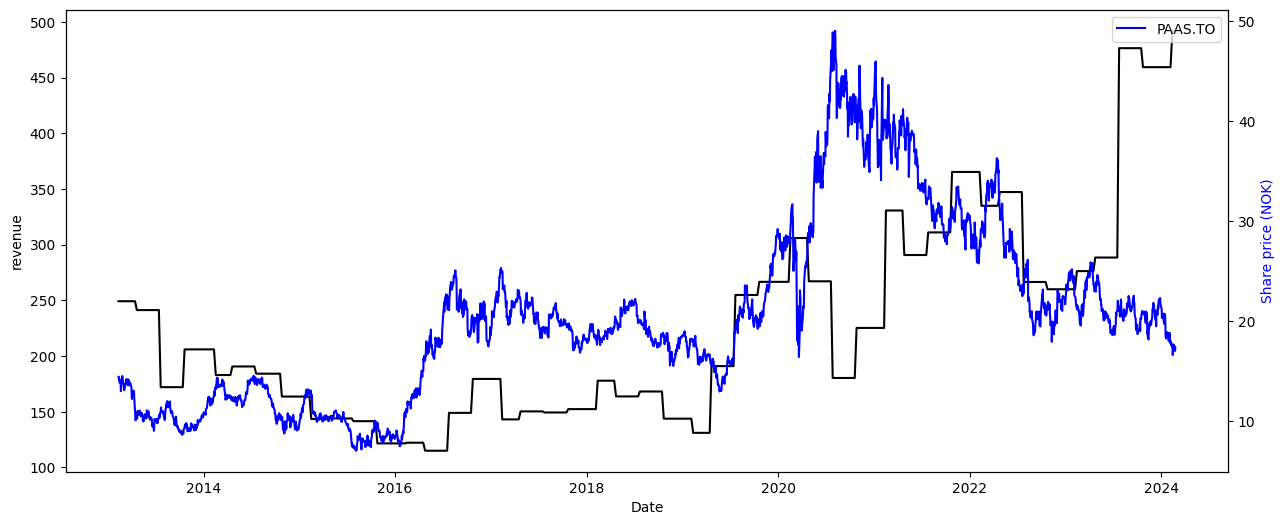

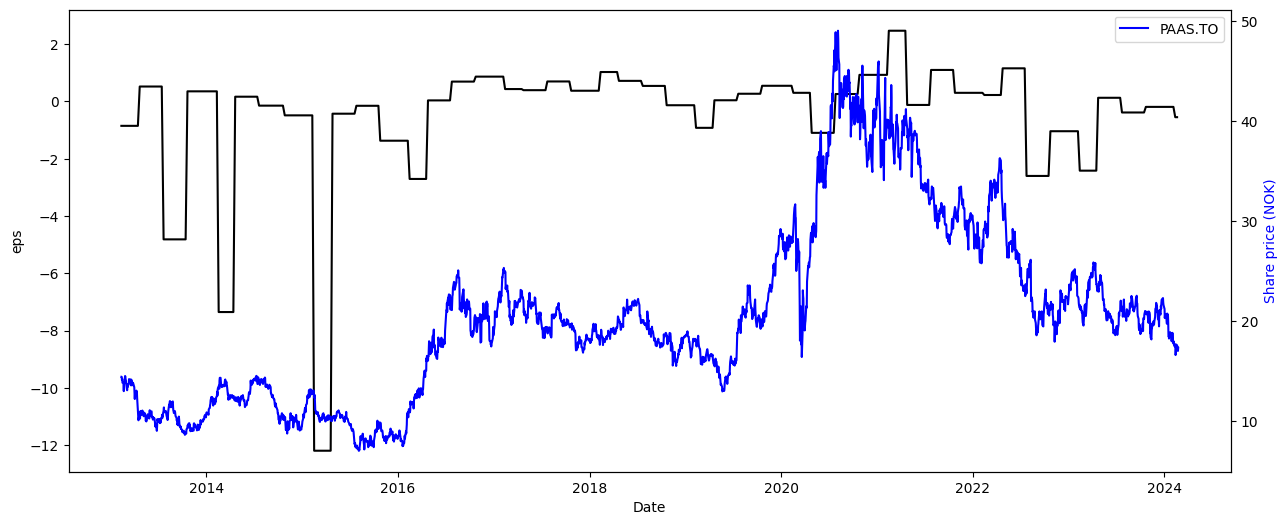

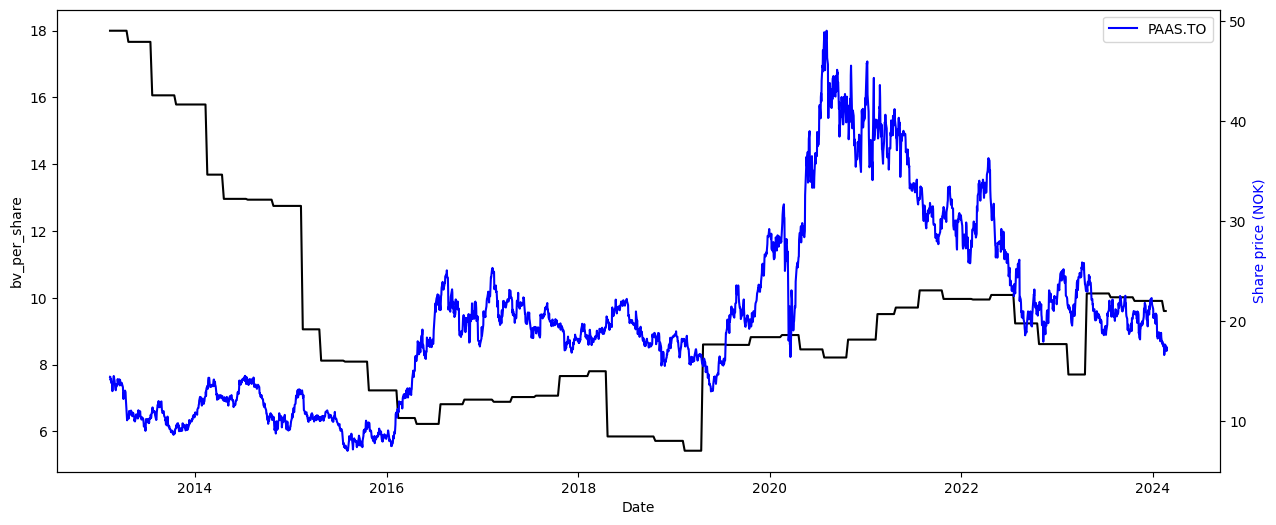

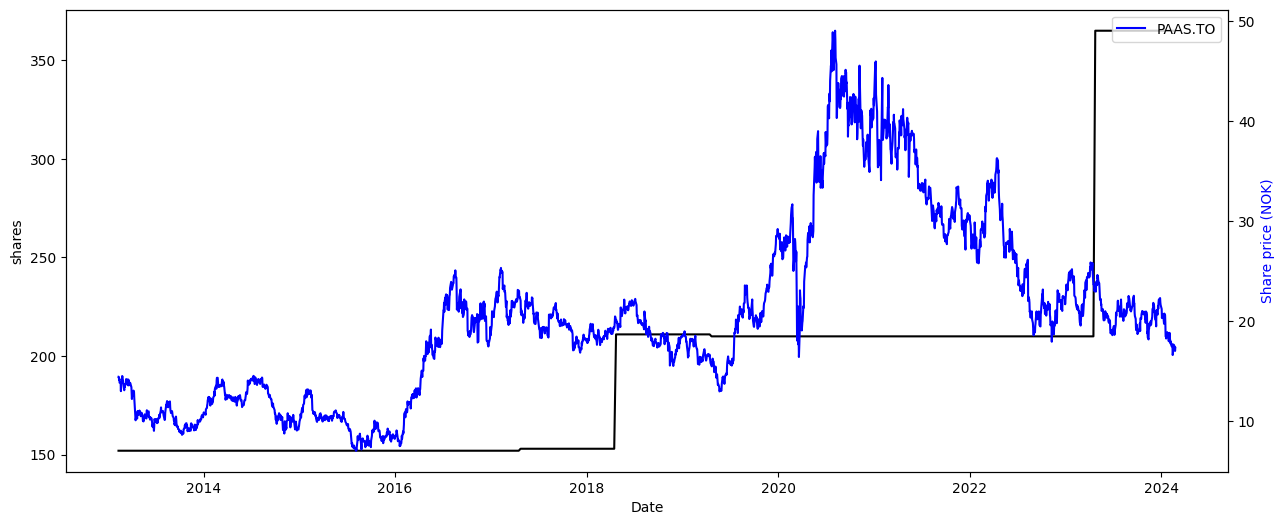

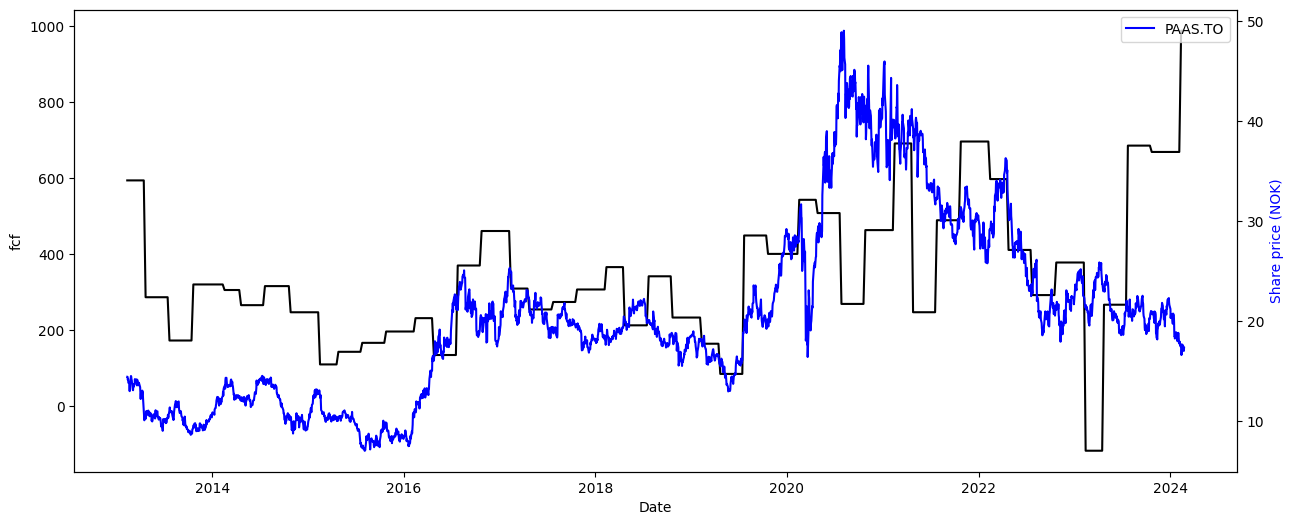

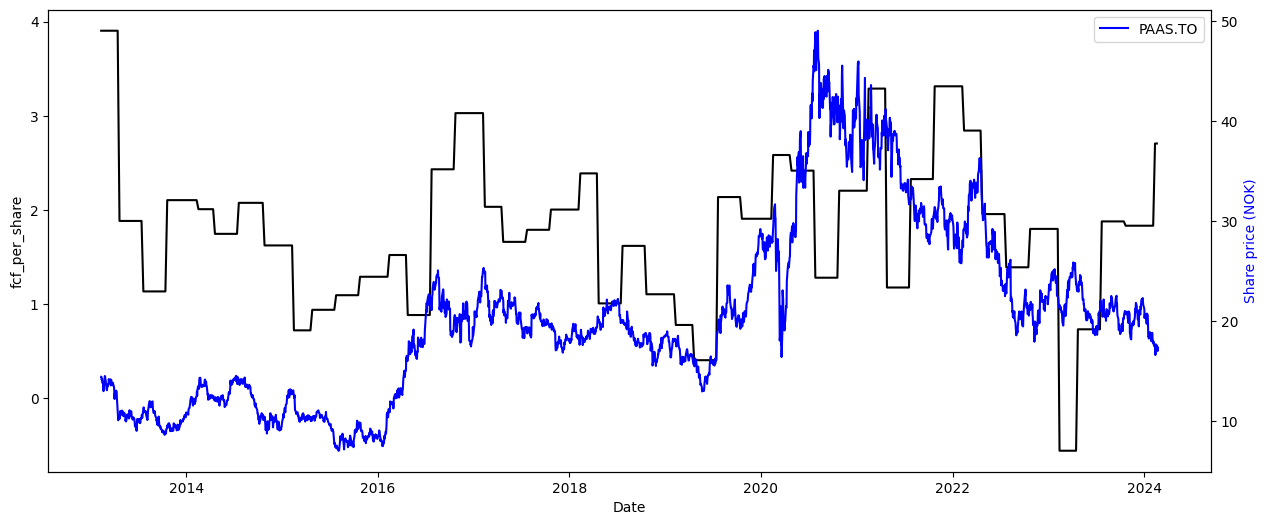

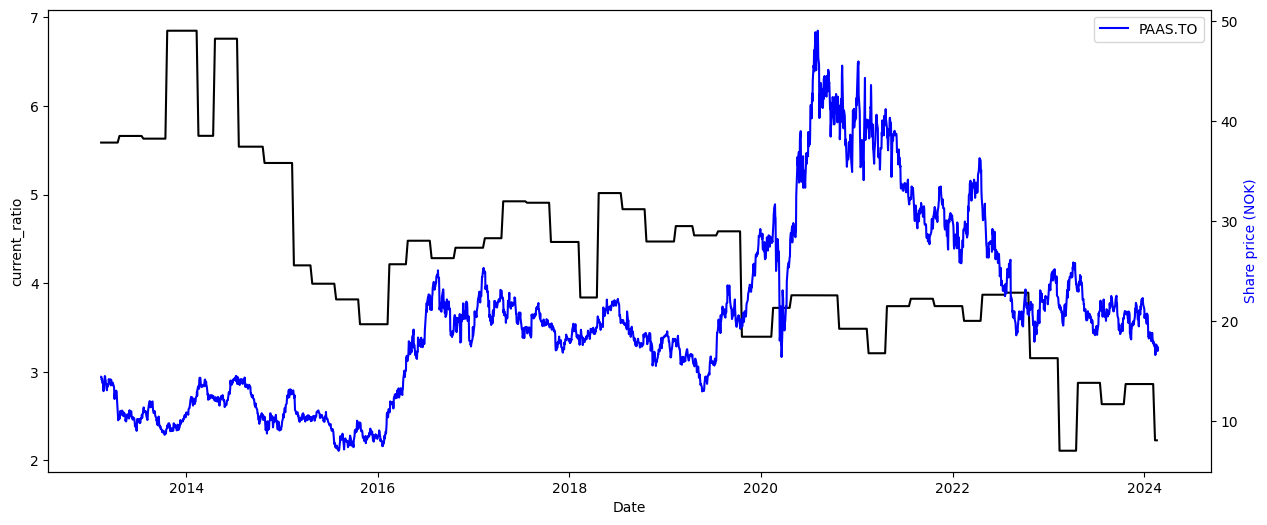

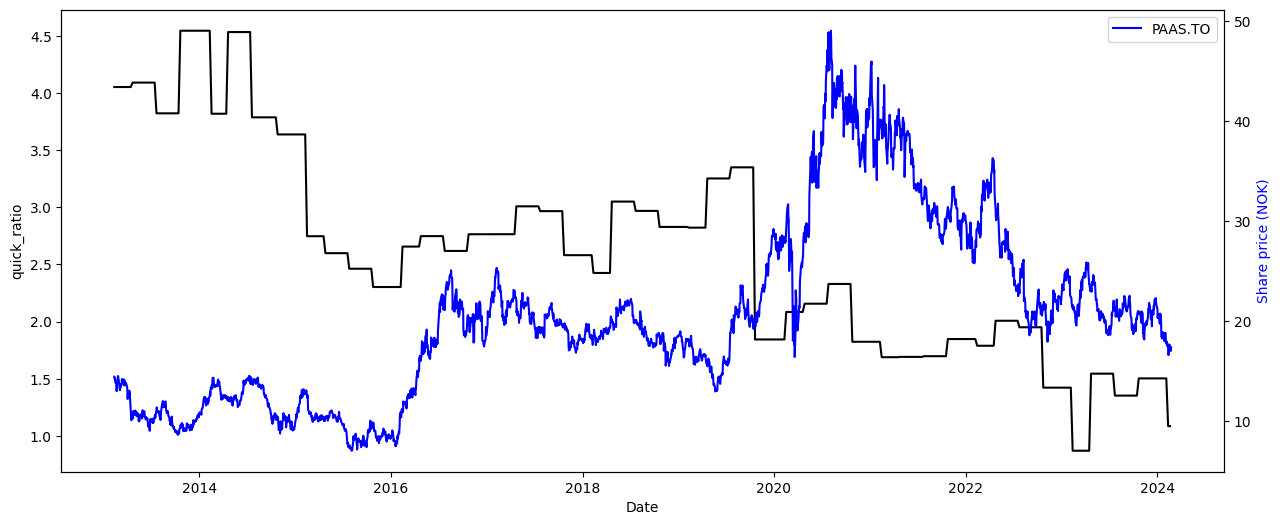

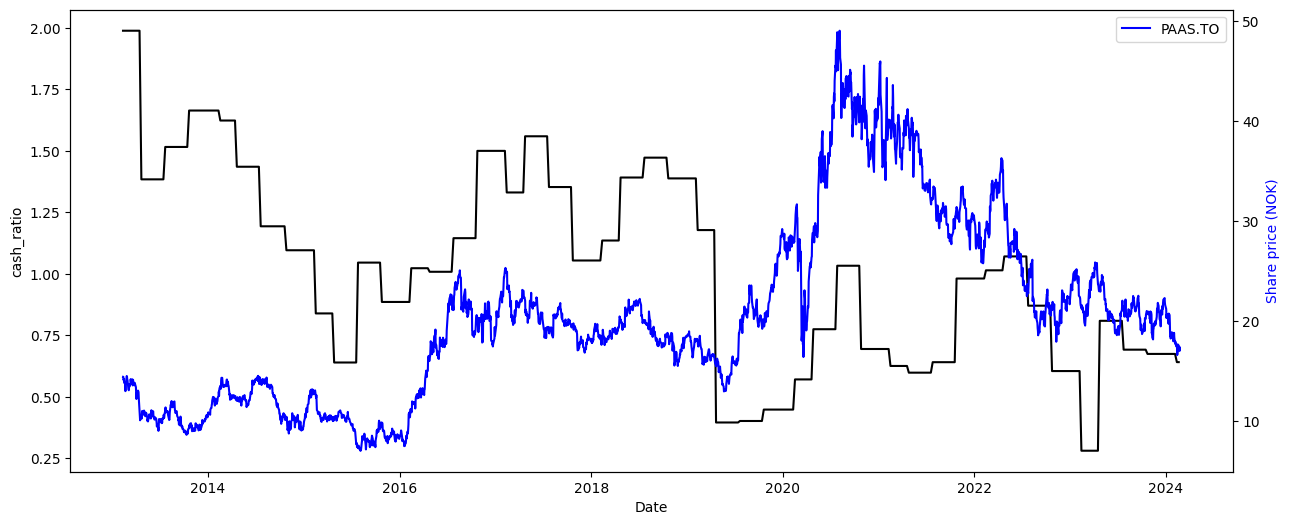

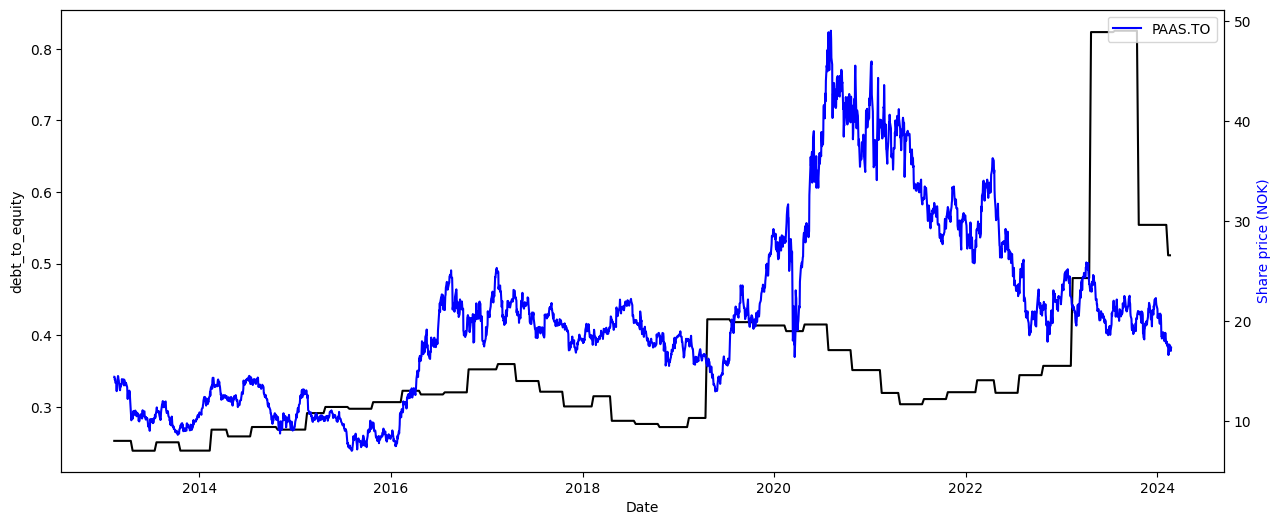

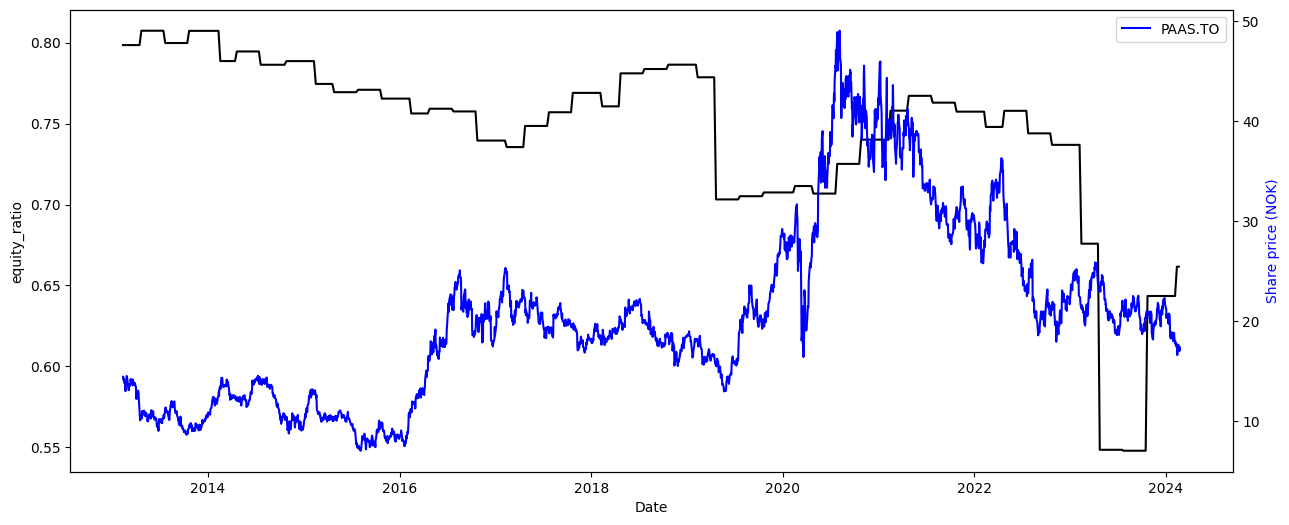

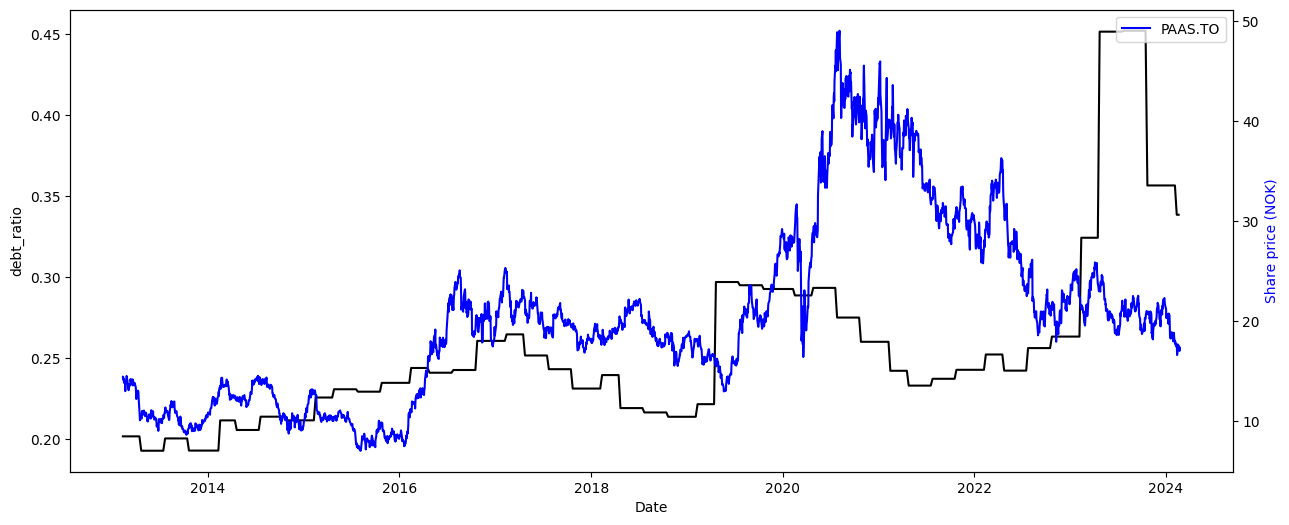

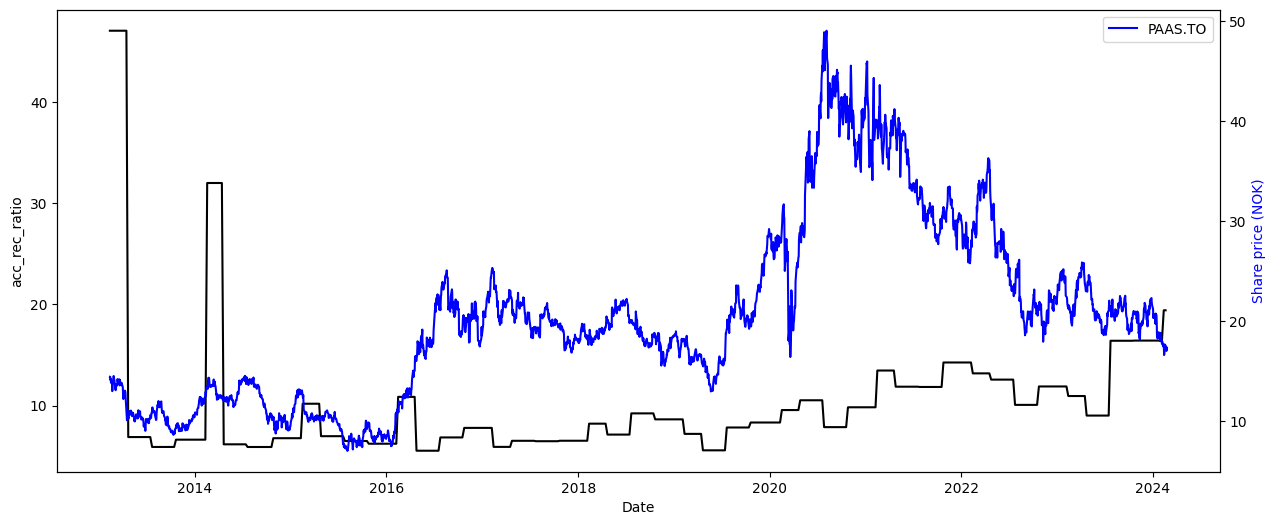

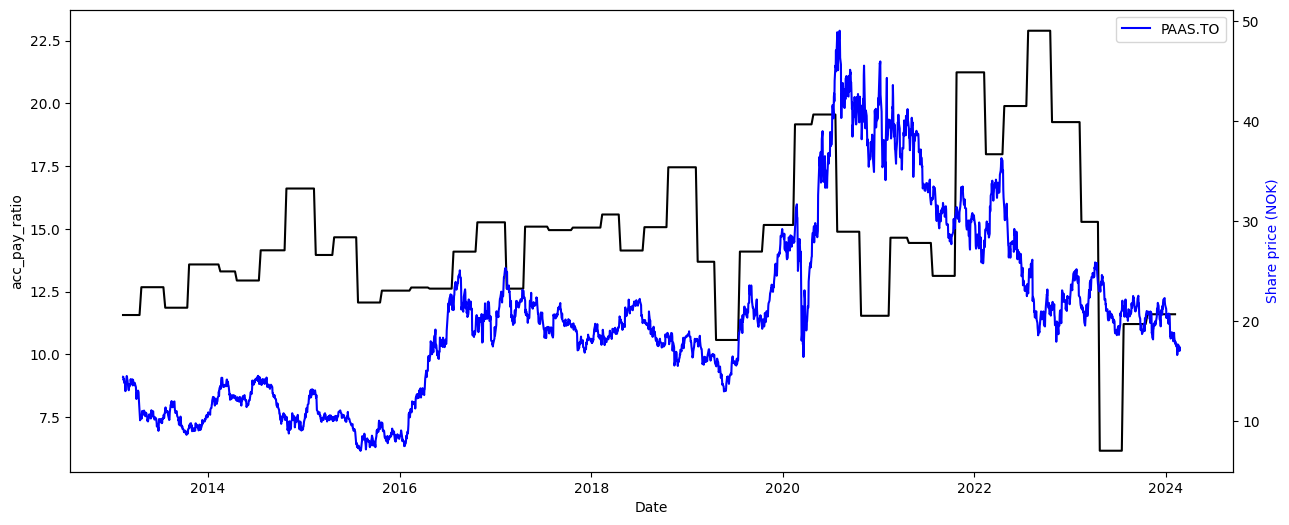

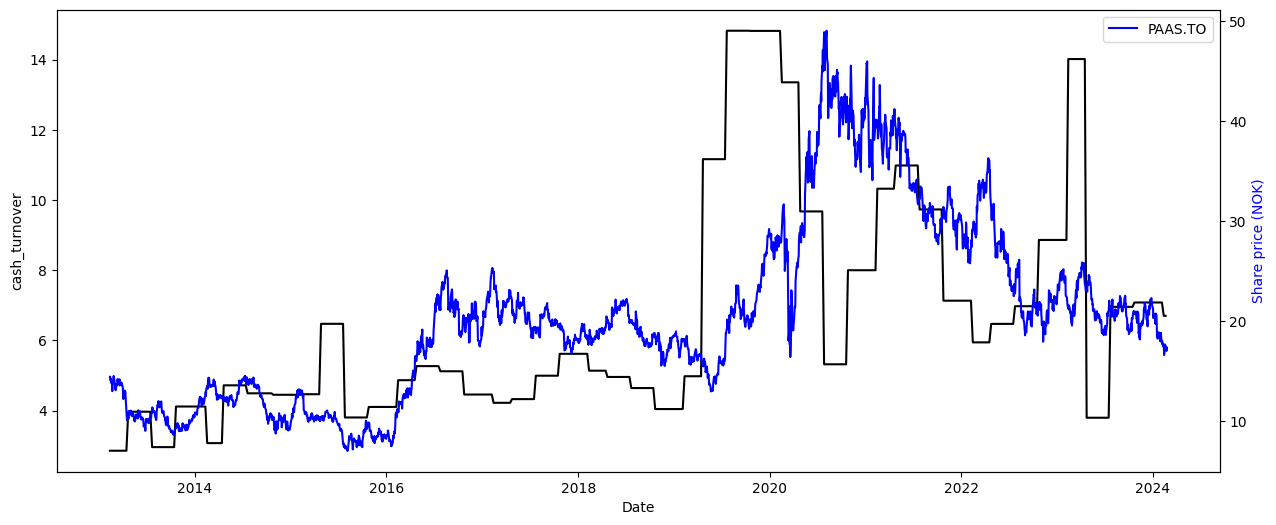

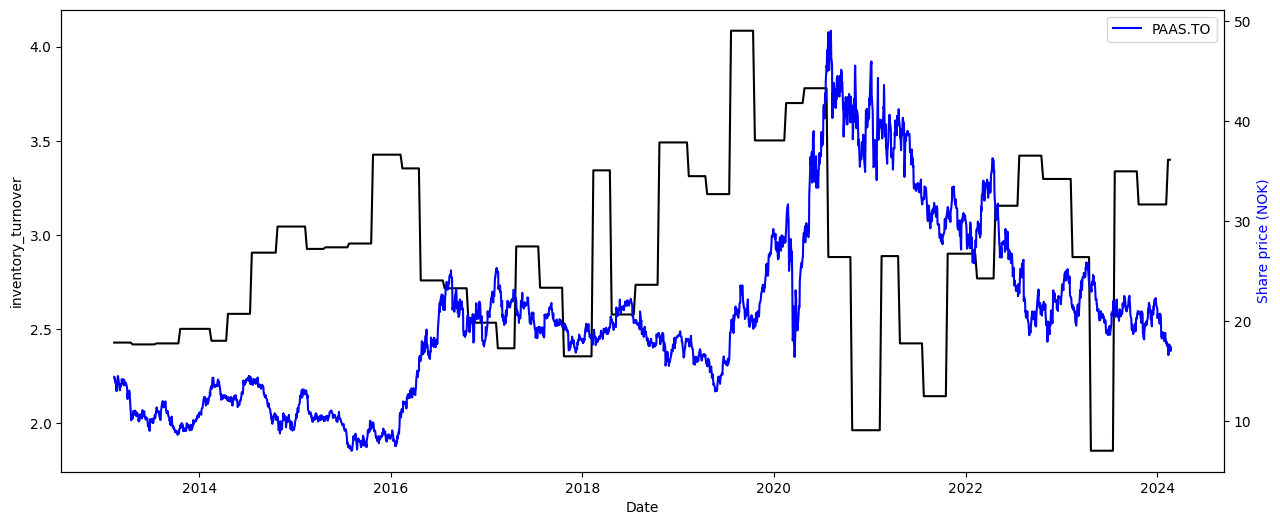

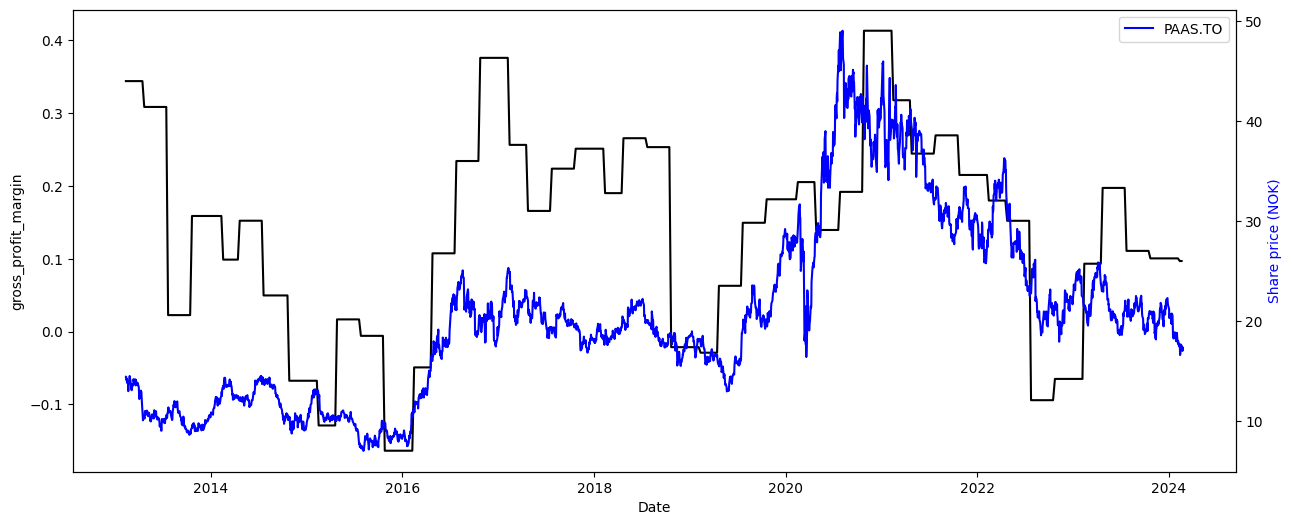

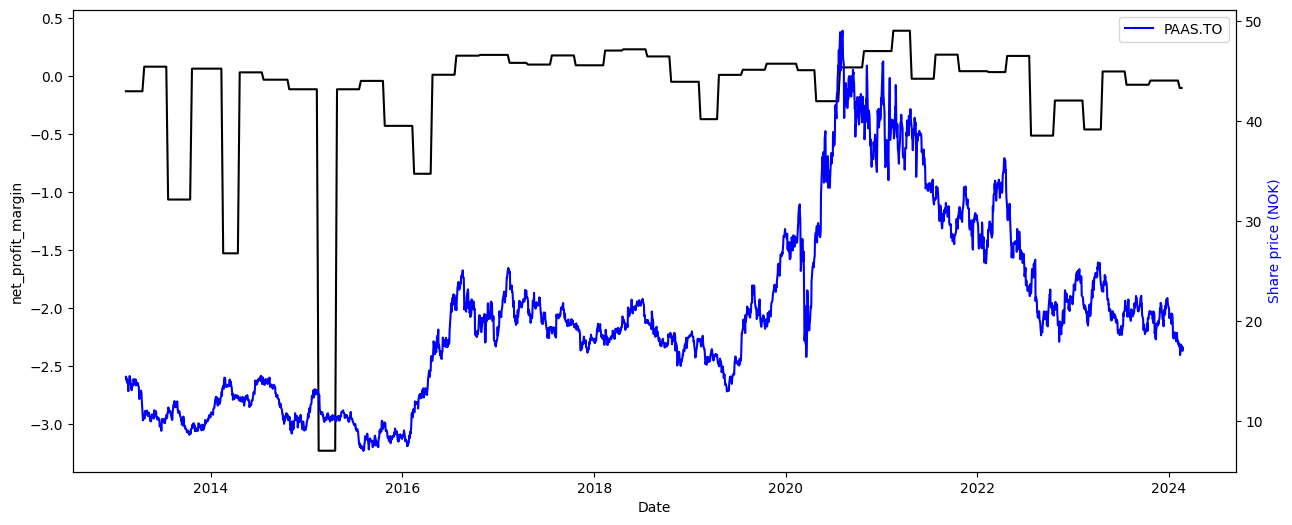

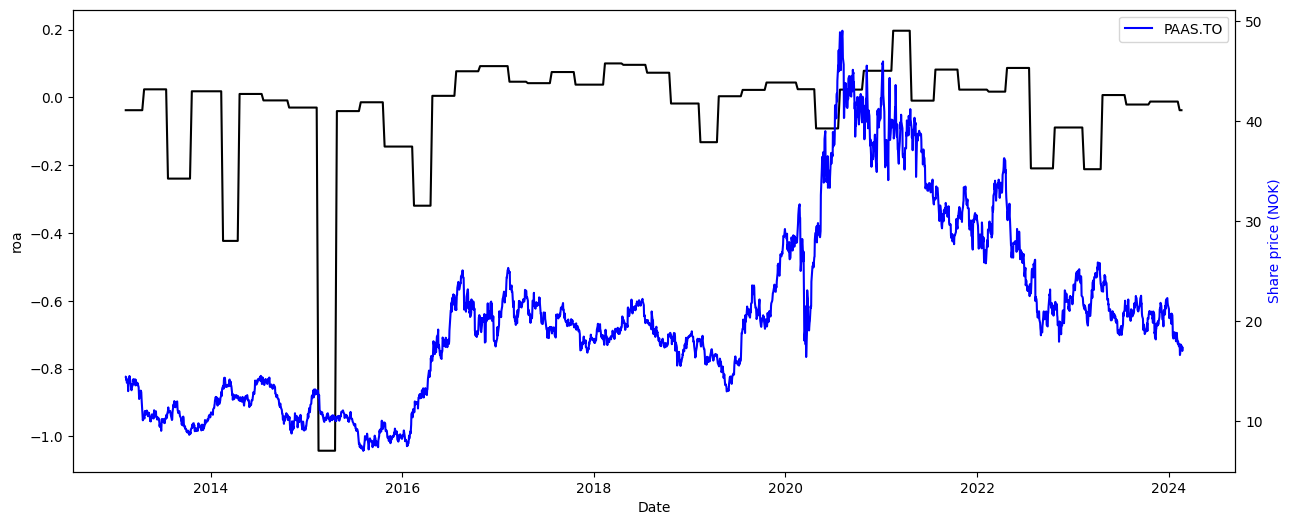

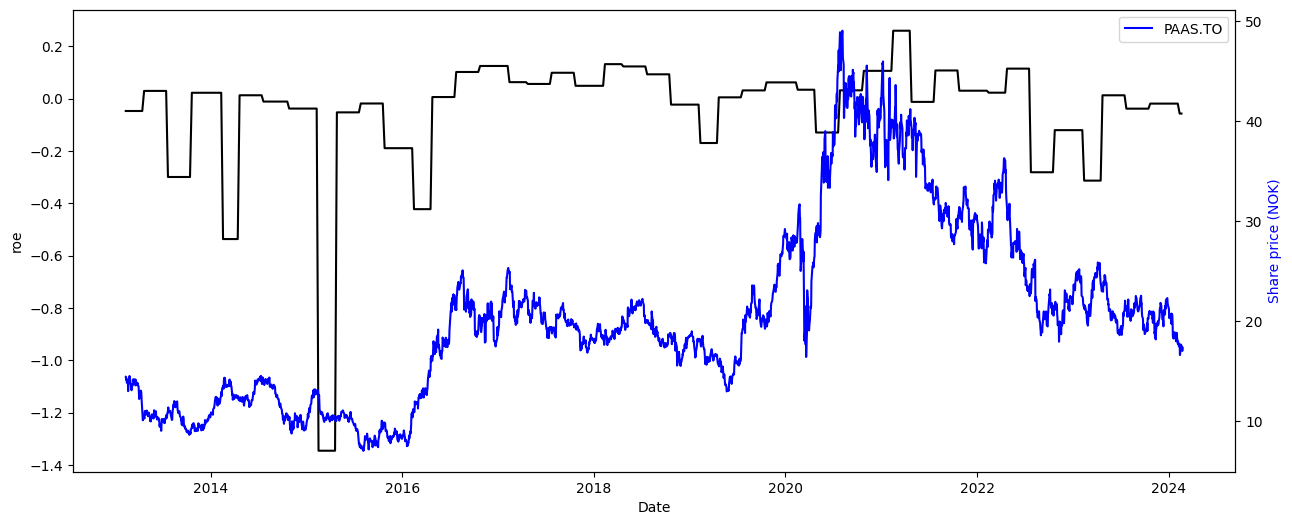

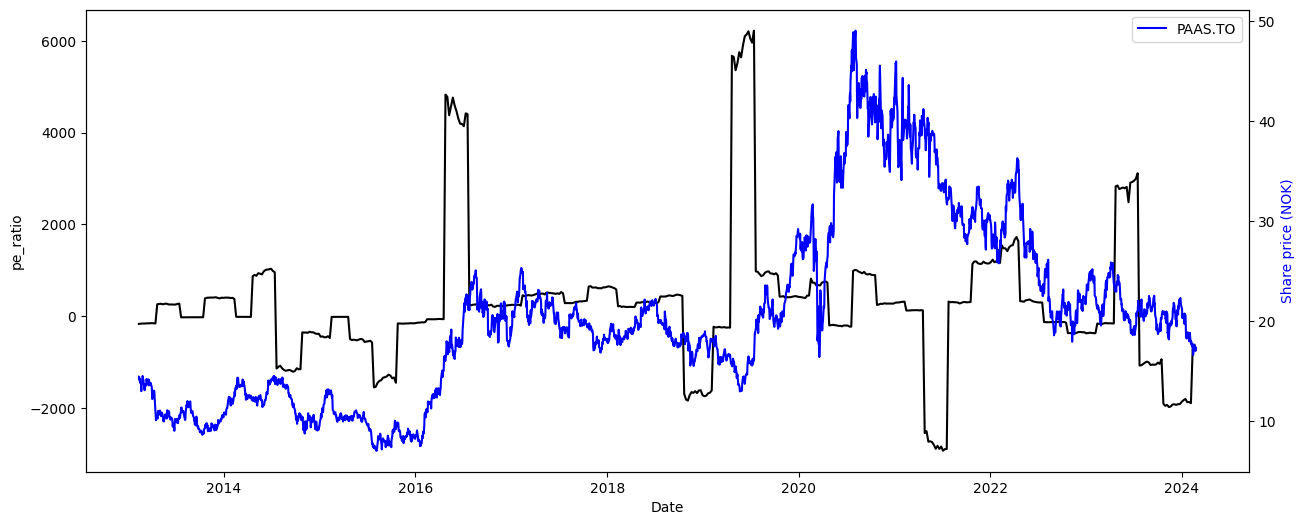

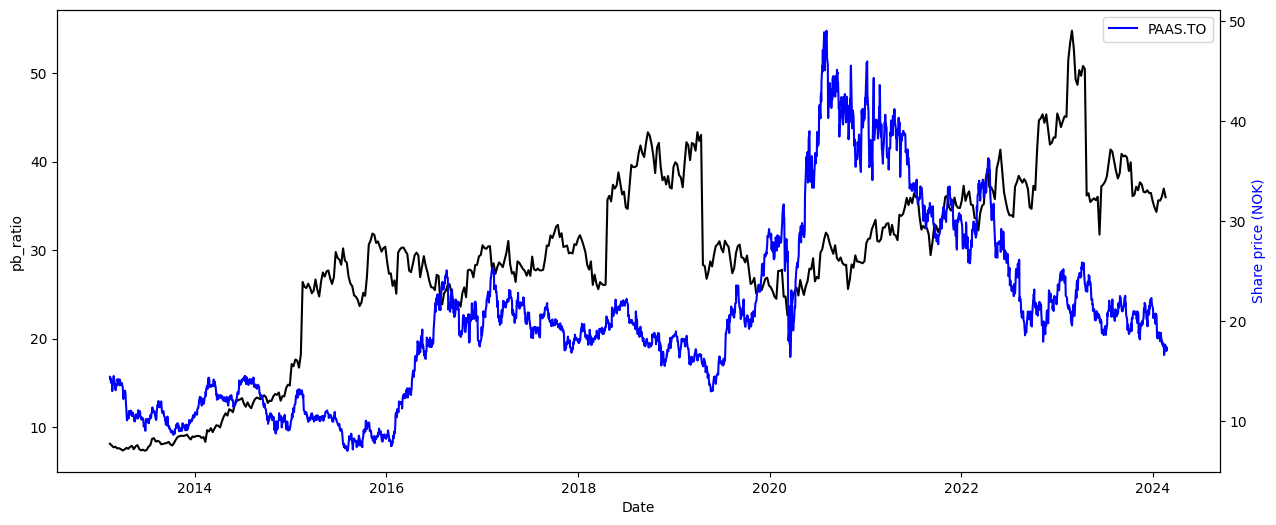

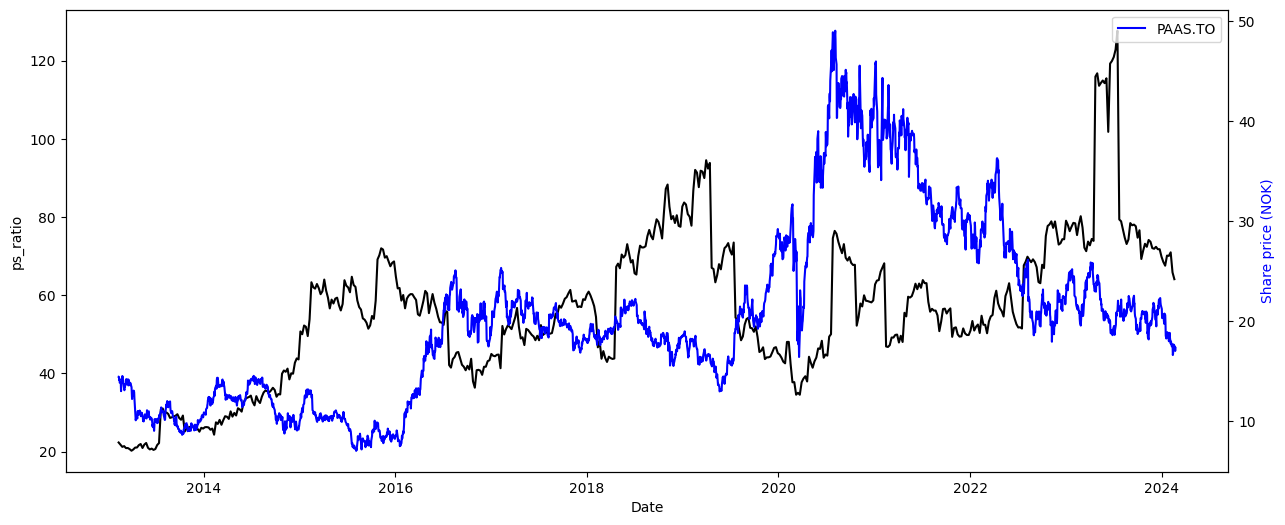

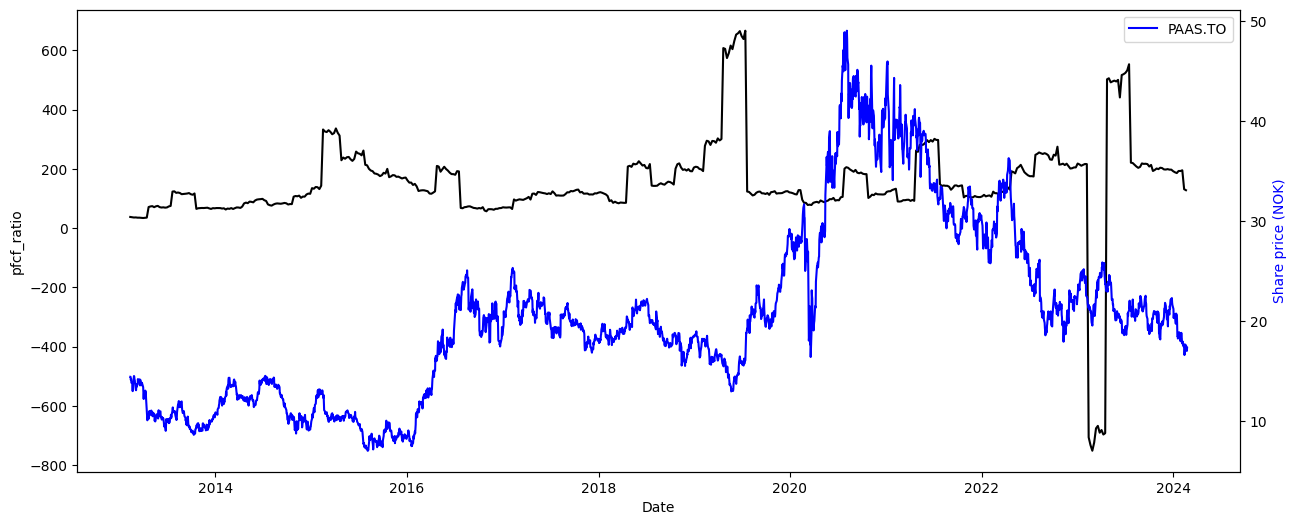

In [22]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=column)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (NOK)', color='b')

    plt.legend()
    plt.show()

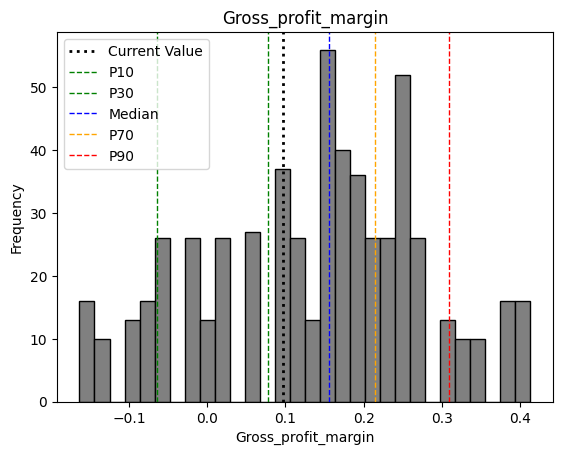

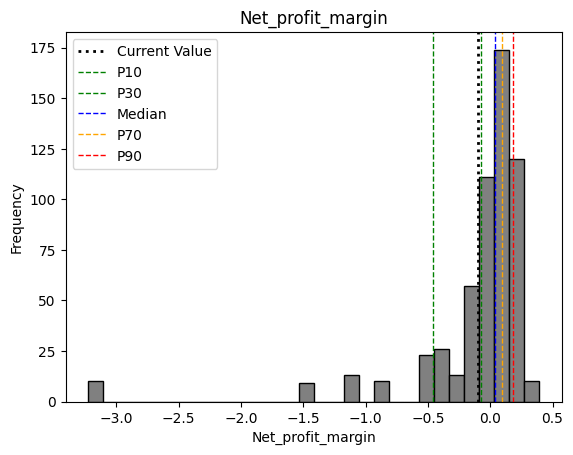

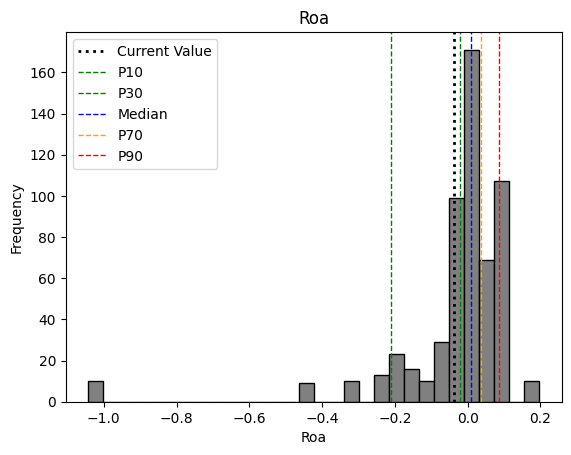

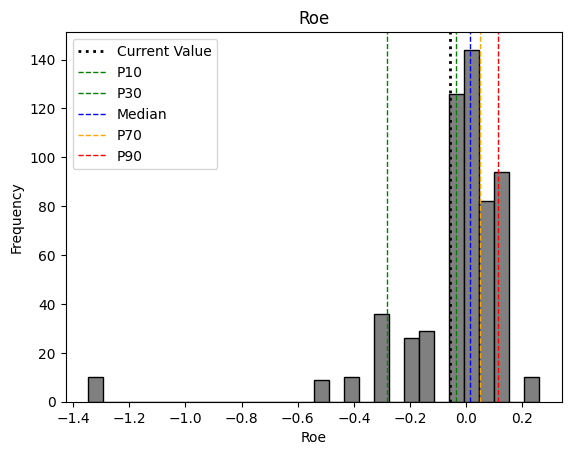

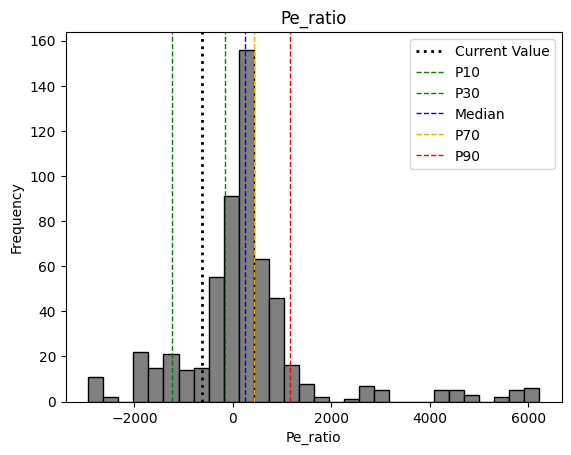

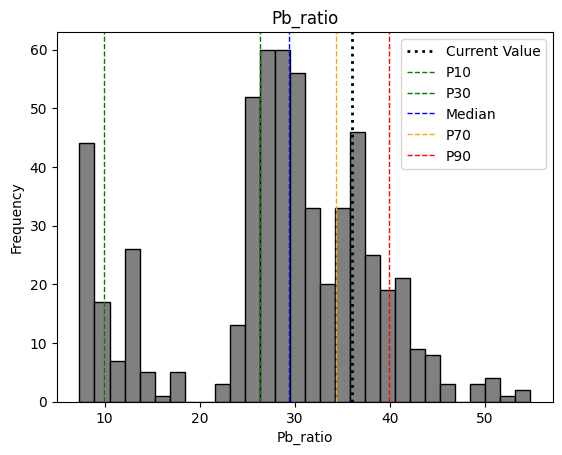

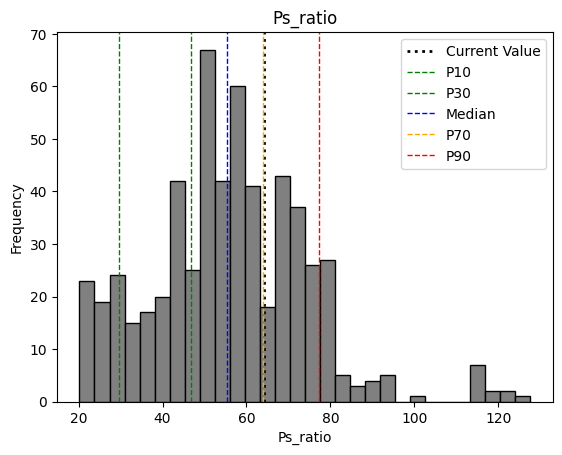

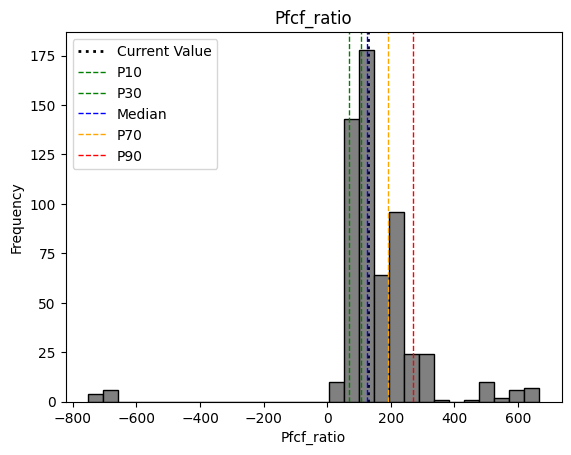

In [23]:
for column in merged_nat_curr.columns[-8:]:
    try:
        plt.hist(merged_nat_curr[column].values, bins=30, edgecolor='black', color='gray')
        plt.axvline(merged_nat_curr[column].iloc[-1], color='k', linestyle='dotted', linewidth=2, label='Current Value')
        plt.axvline(merged_nat_curr[column].quantile(0.1), color='green', linestyle='dashed', linewidth=1, label='P10')
        plt.axvline(merged_nat_curr[column].quantile(0.3), color='green', linestyle='dashed', linewidth=1, label='P30')
        plt.axvline(merged_nat_curr[column].quantile(0.5), color='blue', linestyle='dashed', linewidth=1, label='Median')
        plt.axvline(merged_nat_curr[column].quantile(0.7), color='orange', linestyle='dashed', linewidth=1, label='P70')
        plt.axvline(merged_nat_curr[column].quantile(0.9), color='red', linestyle='dashed', linewidth=1, label='P90')
        
        plt.xlabel(column.capitalize())
        plt.ylabel('Frequency')
        plt.title(column.capitalize())
        
        plt.legend()

        plt.show()
    except:
        print(column + " diagram is missing due to error.")

## Calculate correlation between value parameters

In [24]:
corr_matrix = pd.DataFrame(merged_nat_curr, columns=['real_date', 'gross_profit_margin', 'net_profit_margin', 'roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'pfcf_ratio'])
# find independent columns
corr_matrix.corr()

,real_date,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
real_date,1.000000,0.104086,0.244926,0.203069,0.191742,-0.008356,0.808571,0.637839,0.107074
gross_profit_margin,0.104086,1.000000,0.541540,0.585228,0.590071,0.149412,-0.079162,-0.255234,-0.185788
net_profit_margin,0.244926,0.541540,1.000000,0.988427,0.984708,0.113392,0.139019,0.006186,-0.048565
roa,0.203069,0.585228,0.988427,1.000000,0.999542,0.117712,0.082392,-0.050337,-0.035017
roe,0.191742,0.590071,0.984708,0.999542,1.000000,0.121745,0.068597,-0.058354,-0.019737
pe_ratio,-0.008356,0.149412,0.113392,0.117712,0.121745,1.000000,-0.042789,0.073061,0.307963
pb_ratio,0.808571,-0.079162,0.139019,0.082392,0.068597,-0.042789,1.000000,0.821609,0.069274
ps_ratio,0.637839,-0.255234,0.006186,-0.050337,-0.058354,0.073061,0.821609,1.000000,0.388817
pfcf_ratio,0.107074,-0.185788,-0.048565,-0.035017,-0.019737,0.307963,0.069274,0.388817,1.000000


In [25]:
tolerance = 0.2

In [26]:
gpm = merged_nat_curr[(merged_nat_curr['gross_profit_margin']<= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['gross_profit_margin']>= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1- tolerance))]['date'].values
roe = merged_nat_curr[(merged_nat_curr['roe']<= merged_nat_curr['roe'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['roe']>= merged_nat_curr['roe'].iloc[-1] * (1- tolerance))]['date'].values
per = merged_nat_curr[(merged_nat_curr['pe_ratio']<= merged_nat_curr['pe_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pe_ratio']>= merged_nat_curr['pe_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pbr = merged_nat_curr[(merged_nat_curr['pb_ratio']<= merged_nat_curr['pb_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pb_ratio']>= merged_nat_curr['pb_ratio'].iloc[-1] * (1- tolerance))]['date'].values
psr = merged_nat_curr[(merged_nat_curr['ps_ratio']<= merged_nat_curr['ps_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['ps_ratio']>= merged_nat_curr['ps_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pfcfr = merged_nat_curr[(merged_nat_curr['pfcf_ratio']<= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pfcf_ratio']>= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1- tolerance))]['date'].values

In [27]:
test3 =  utils.list_intersect(gpm, roe)
#test4 =  utils.list_intersect(test3, per)
test5 =  utils.list_intersect(test3, pbr)
test6 =  utils.list_intersect(test5, psr)
test7 =  utils.list_intersect(test6, pfcfr)
print(len(test7), 'timestemos have been found!')

0 timestemos have been found!


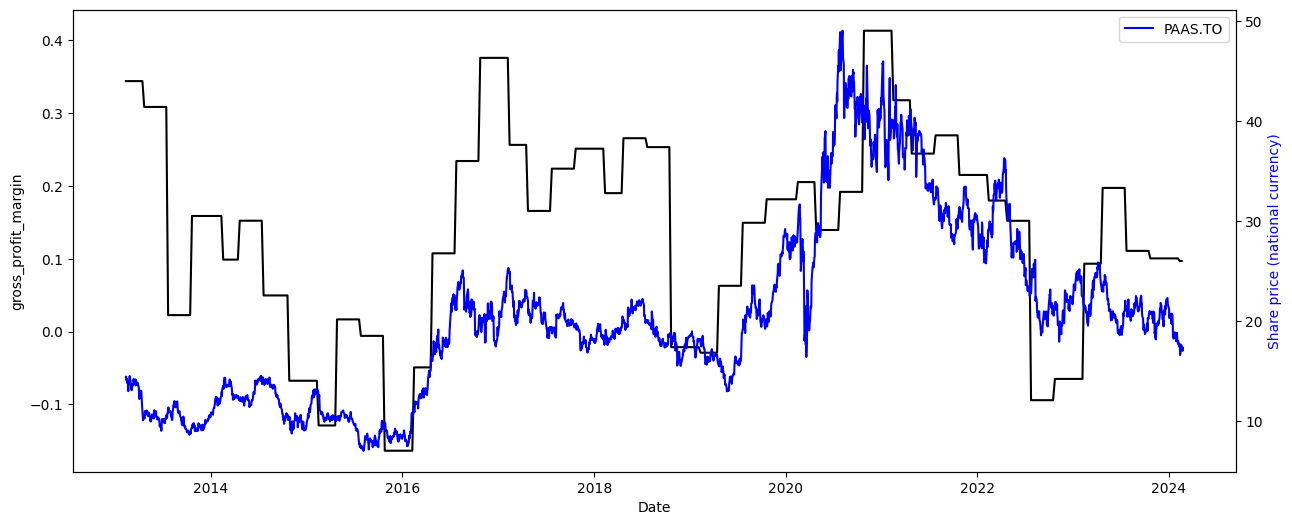

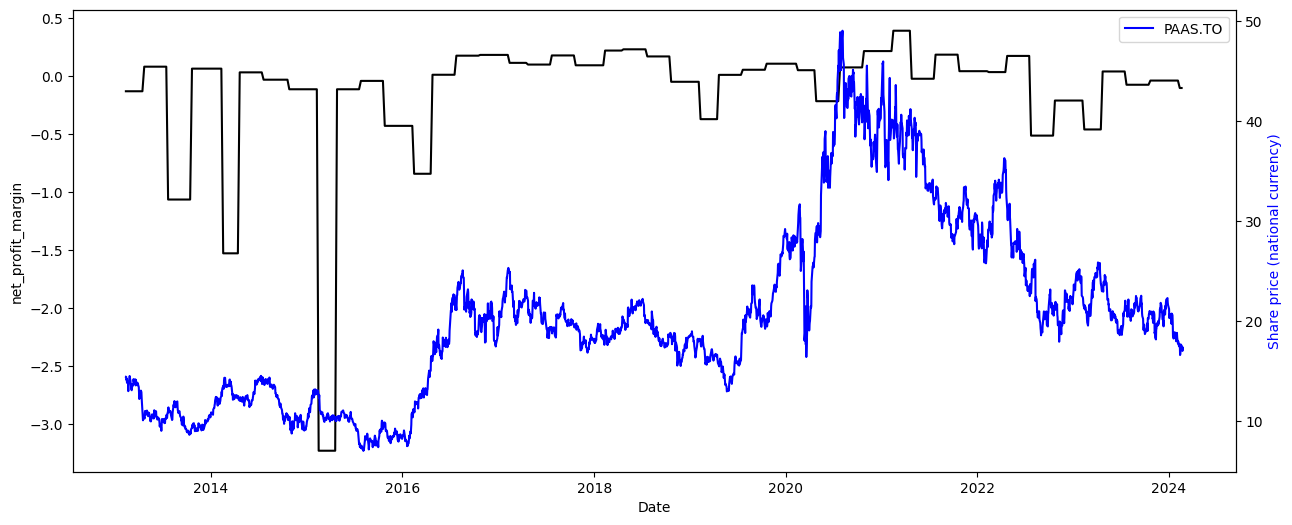

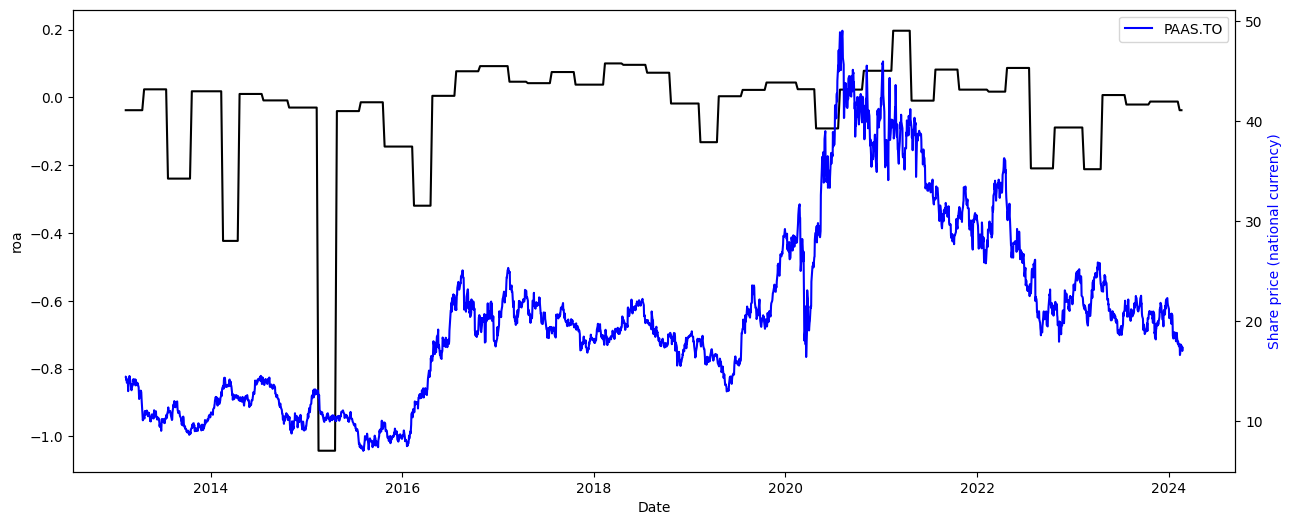

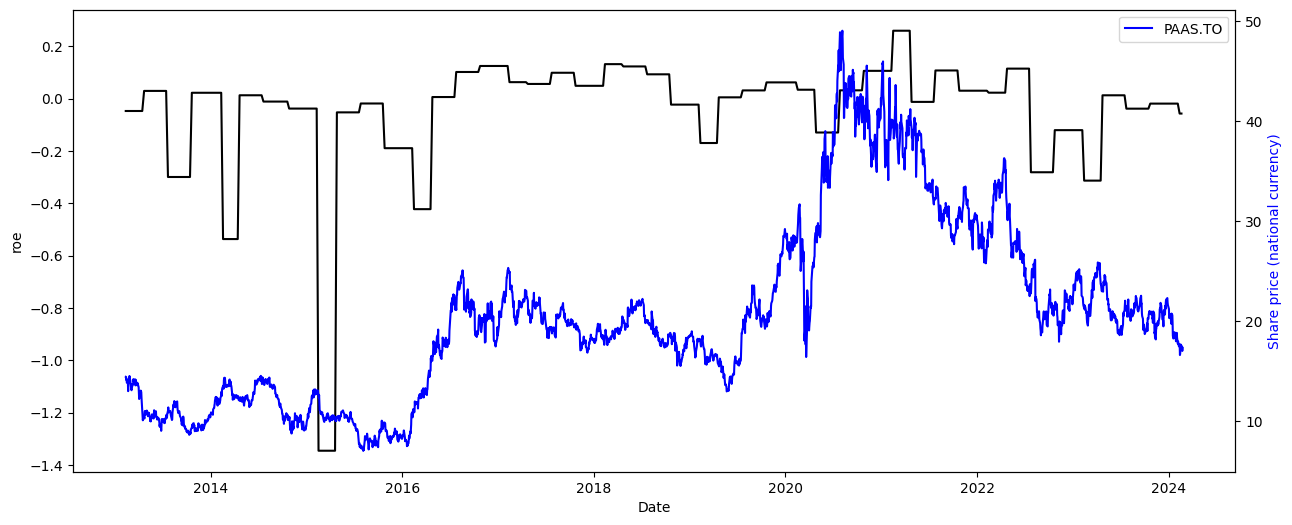

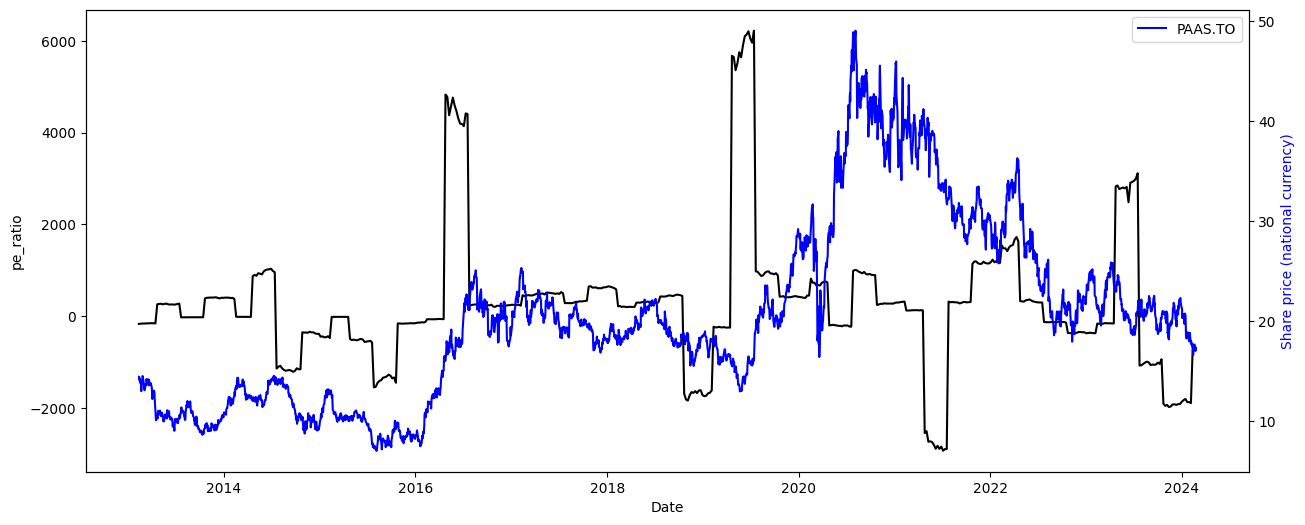

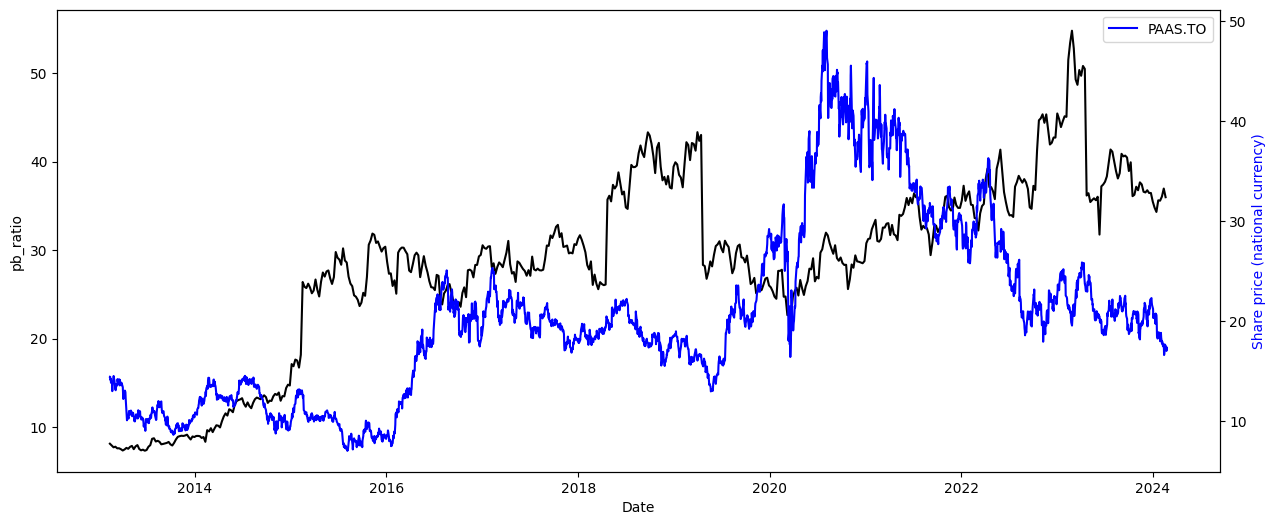

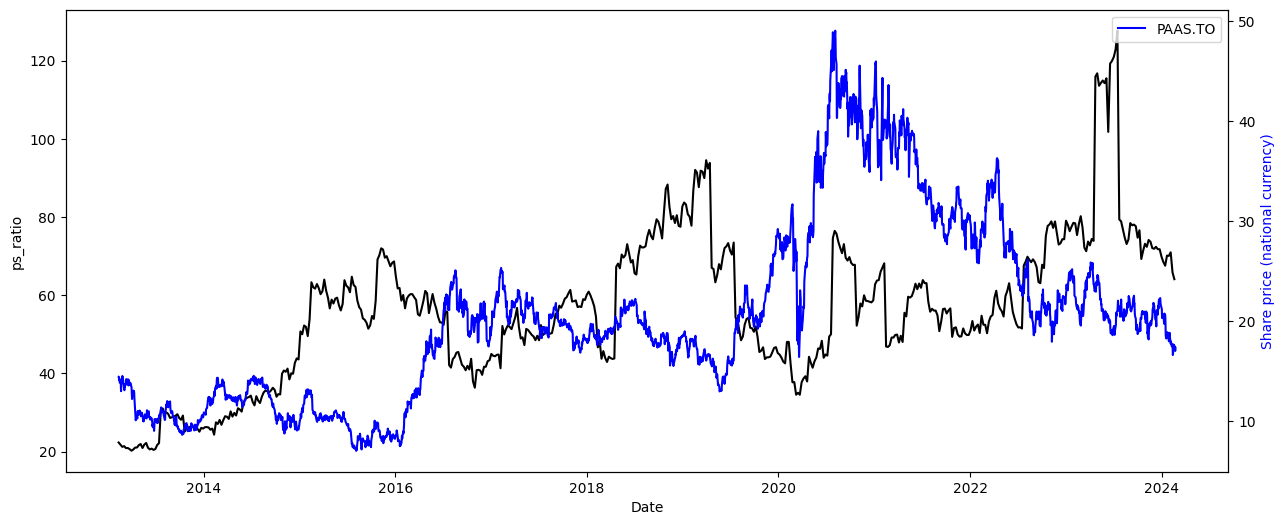

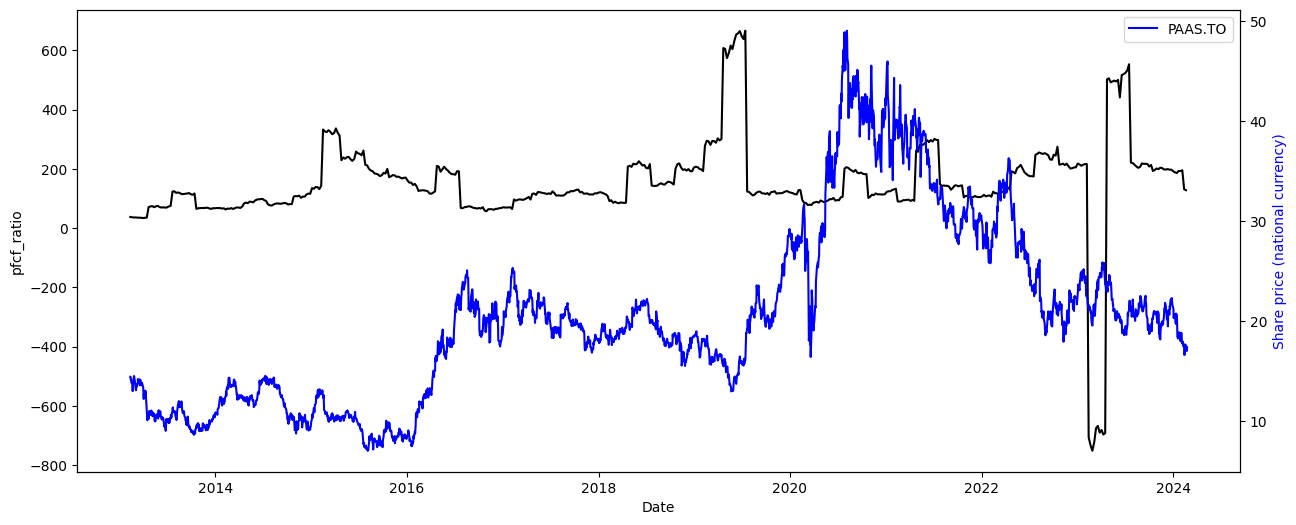

In [28]:
for column in merged_nat_curr.columns[-8:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=column)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    for timestamp in test7:
        plt.axvline(timestamp, color='red', linestyle='dashed', linewidth=1)

    plt.legend()
    plt.show()